In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gauss Seidel

Contoh soal  
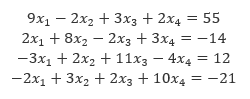

In [42]:
A = np.array([
    [9, -2, 3, 2],
    [2, 8, -2, 3],
    [-3, 2, 11, -4],
    [-2, 3, 2, 10]
])

b = np.array([55, -14, 12, -21])


In [43]:
def is_diagonally_dominant(A):
    abs_diag = np.diag(np.abs(A))
    sum_without_diag = np.sum(np.abs(A), axis=1) - abs_diag
    return np.all(abs_diag - sum_without_diag > 0)

In [44]:
is_diagonally_dominant(A)

True

In [49]:
def gauss_seidel(A, b, tol=0.015, max_iter = 25):
    A_RHS = -A
    np.fill_diagonal(A_RHS, 0)
    diag = np.diag(A)

    old_arr, new_arr = np.zeros(len(A_RHS)), np.zeros(len(A_RHS))
    for i in range(0,max_iter):
        new_arr = np.array(new_arr)
        for j in range(len(new_arr)):
            new_arr[j] = (b[j] + np.dot(A_RHS[j],new_arr)) / diag[j]
        euclidean_err = np.sqrt(np.dot(new_arr-old_arr, new_arr-old_arr))
        print(f'n:{i+1}, x1,x2,x3,x4:{new_arr}, err:{euclidean_err}')
        if euclidean_err <= tol:
            return 'Converge'
        old_arr = new_arr
    return 'Diverge'

In [50]:
gauss_seidel(A, b)

n:1, x1,x2,x3,x4:[ 6.11111111 -3.27777778  3.35353535 -0.56515152], err:7.723671521713559
n:2, x1,x2,x3,x4:[ 4.39046016 -1.79729938  2.40957938 -1.16463403], err:2.5303928844260803
n:3, x1,x2,x3,x4:[ 5.16732568 -2.00269881  2.44080351 -0.95388592], err:0.8313234540500086
n:4, x1,x2,x3,x4:[ 5.06444041 -2.04820201  2.49765287 -0.97218189], err:0.12736762780272443
n:5, x1,x2,x3,x4:[ 5.03944457 -2.02087972  2.47921505 -0.98169018], err:0.0424459654232242
n:6, x1,x2,x3,x4:[ 5.05377509 -2.02550619  2.48050699 -0.97769452], err:0.015633367932236058
n:7, x1,x2,x3,x4:[ 5.05142841 -2.02609491  2.481427   -0.97817124], err:0.002631945978387627


'Converge'

# Least Square Regression  

Contoh soal:  
<img src="./Least-Square-Regression.png" width="700px">  
<span style="font-size:10px;">
x = [1.3604935458559992, 1.5853985257024064, 0.5679347497479994, 0.21802392874941856, 0.06206493009274472, 1.6038707575944073, 1.5373131133875226, 1.4259588903280196, 0.43245973529077086, 0.257850612191316, 0.8605233835228834, 1.2181914607549382, 1.685409170644646, 0.12380139845637994, 0.13435858737521222, 0.4033370073012925, 0.619722978580614, 1.8628033810771025, 0.40953337540132173, 0.30874442757643994, 1.6891968832960647, 1.4690587356094642, 1.0467612052854245, 1.9070607586182264, 0.3931032996568269, 1.5213063293089268, 0.6792243360513193, 1.0368081016233708, 0.6336032973174668, 0.374905103792015, 1.771763274305583, 1.1559028146600263, 0.17306906153876445, 0.40602786961550885, 1.9021950999201134, 0.7404956567184318, 0.9651727271458386, 1.9916255775351712, 0.2532403679742896, 1.2463066512639314, 1.241263902486962, 1.7213322132140918, 1.3414349017801748, 0.8749630082448829, 0.2365239274541533, 0.6619637276533039, 0.14776060842856809, 0.44702252616842086, 0.7825174342129761, 0.6568730252477795]  
</span>

<span style="font-size:10px;">
y = [1.8860894486952637, 3.4538075220063913, 0.4326122937324488, -0.16109290897894835, 1.0258216227918515, 2.5614347377115334, 3.9711567124023173, 2.5050179041851806, 0.44187536608782496, 0.32763720038740907, 1.8914749598149787, 2.978721894531936, 2.5263464521598777, 1.2309986450932542, -0.0002015887018562701, 0.40845185338253454, 1.261882153097084, 2.890613004730457, 1.5142607191006958, 1.4558182978954157, 3.0535665102311498, 2.5305265858696826, 2.9943005644276735, 4.775595583754577, 0.2511451686187445, 2.662286088591588, 0.7013711036412655, 1.3574878178829441, 0.45879261586108844, 1.041383576988614, 3.2345537741888895, 2.9442588452869383, 0.32481178798514976, 0.5676922986388366, 4.6507103639541985, 1.9206250787747186, 2.0631617694637643, 4.718498033969695, 0.328918880734296, 2.5468066110409096, 2.56571088586923, 3.1028383540315225, 1.916718978555218, 1.9674896037631926, 0.20908513317900246, 1.3752289600324012, 0.21057773380247213, 1.1962232390302614, 0.7068252906124675, 1.428520921524234]
</span>

In [84]:
x = [1.3604935458559992, 1.5853985257024064, 0.5679347497479994, 0.21802392874941856, 0.06206493009274472, 1.6038707575944073, 1.5373131133875226, 1.4259588903280196, 0.43245973529077086, 0.257850612191316, 0.8605233835228834, 1.2181914607549382, 1.685409170644646, 0.12380139845637994, 0.13435858737521222, 0.4033370073012925, 0.619722978580614, 1.8628033810771025, 0.40953337540132173, 0.30874442757643994, 1.6891968832960647, 1.4690587356094642, 1.0467612052854245, 1.9070607586182264, 0.3931032996568269, 1.5213063293089268, 0.6792243360513193, 1.0368081016233708, 0.6336032973174668, 0.374905103792015, 1.771763274305583, 1.1559028146600263, 0.17306906153876445, 0.40602786961550885, 1.9021950999201134, 0.7404956567184318, 0.9651727271458386, 1.9916255775351712, 0.2532403679742896, 1.2463066512639314, 1.241263902486962, 1.7213322132140918, 1.3414349017801748, 0.8749630082448829, 0.2365239274541533, 0.6619637276533039, 0.14776060842856809, 0.44702252616842086, 0.7825174342129761, 0.6568730252477795]
y = [1.8860894486952637, 3.4538075220063913, 0.4326122937324488, -0.16109290897894835, 1.0258216227918515, 2.5614347377115334, 3.9711567124023173, 2.5050179041851806, 0.44187536608782496, 0.32763720038740907, 1.8914749598149787, 2.978721894531936, 2.5263464521598777, 1.2309986450932542, -0.0002015887018562701, 0.40845185338253454, 1.261882153097084, 2.890613004730457, 1.5142607191006958, 1.4558182978954157, 3.0535665102311498, 2.5305265858696826, 2.9943005644276735, 4.775595583754577, 0.2511451686187445, 2.662286088591588, 0.7013711036412655, 1.3574878178829441, 0.45879261586108844, 1.041383576988614, 3.2345537741888895, 2.9442588452869383, 0.32481178798514976, 0.5676922986388366, 4.6507103639541985, 1.9206250787747186, 2.0631617694637643, 4.718498033969695, 0.328918880734296, 2.5468066110409096, 2.56571088586923, 3.1028383540315225, 1.916718978555218, 1.9674896037631926, 0.20908513317900246, 1.3752289600324012, 0.21057773380247213, 1.1962232390302614, 0.7068252906124675, 1.428520921524234]

x, y = np.array(x), np.array(y)

In [85]:
def least_square_regression(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    b = y[:, np.newaxis]

    beta = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), b)
    return beta

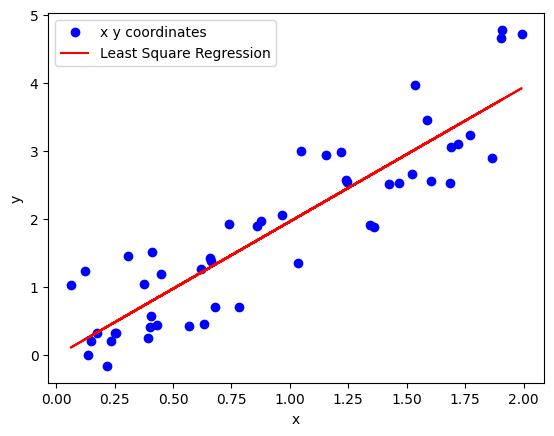

In [95]:
beta = least_square_regression(x, y)
m = beta[0]
b = beta[1]
plt.plot(x, y, 'bo', label='x y coordinates')
plt.plot(x, m*x+b, 'red', label='Least Square Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Newton Raphson

Contoh Soal:  
<img src="./Newton-Raphson.png" width="600px">

In [59]:
def f(x):
    return x**6 + 2*x**2 - 3

def g(x):
    return 6*x**5 + 4*x

In [62]:
def newton_raphson(f, g, x0, tol = 0.01, max_iter = 15):
    for i in range(max_iter):
        x1 = x0 - (f(x0)/g(x0))
        e = f(x1)
        print(f'i:{i+1}, root={x1}, y={f(x1)}')
        if e < tol:
            return x1
        x0 = x1
    return None
        
    

In [63]:
newton_raphson(f, g, 4)

i:1, root=3.330357142857143, y=1383.5924350727805
i:2, root=2.7705278067251076, y=464.59800881643525
i:3, root=2.3014692834655897, y=156.19772641717887
i:4, root=1.9076486911265778, y=52.471960765458746
i:5, root=1.5780738506315775, y=17.424781653949587
i:6, root=1.3101344278134677, y=5.489930074416577
i:7, root=1.1168277838634215, y=1.435124729216346
i:8, root=1.0204619280744585, y=0.21191101467313622
i:9, root=1.0006965918207418, y=0.006974174054037441


1.0006965918207418

# Riemann Integral

Contoh soal:  
<img src="./Riemann-Integral.png" alt="soal-riemann" width="800px">

In [81]:
def f1(x):
    return 4*x**4 + 2*x**3 - 6*x

def left_riemann(f, a, b, n):
    x = np.linspace(a, b, n)
    w = (b-a)/(n-1)
    return w*np.sum(f(x)[:-1])

def right_riemann(f, a, b, n):
    x = np.linspace(a, b, n)
    w = (b-a)/(n-1)
    return w*np.sum(f(x)[1:])

def mid_riemann(f, a, b, n):
    x = np.linspace(a, b, n)
    w = (b-a)/(n-1)
    xmid = (x[:-1] + x[1:])/2
    return w*np.sum(f(xmid))

In [82]:
print(left_riemann(f1, -3, 3, 30))
print(right_riemann(f1, -3, 3, 30))
print(mid_riemann(f1, -3, 3, 30))

384.4323034267851
399.3288551509231
387.26026006636687
